In [225]:
import pandas as pd
import numpy as np
data=pd.read_csv('AmesHousing.csv')
#data.info()

In [227]:
#Y=data["SalePrice"]
#making it display all the rows
pd.set_option('display.max_rows', None)
#displaying the null values for each feature
#data.isnull().sum()

In [310]:
#dropping columns with a lot of missing values
x=data.drop(columns=['Alley','Mas Vnr Type','Fireplace Qu','Pool QC','Fence','Misc Feature'])
#checking whether the majority of the data has the same value for each feature (could be found on Kaggle as well)
x['Screen Porch'].value_counts()
#dropping irrelevent data
x=x.drop(columns=['Order','PID','Street','Utilities','Land Contour'
                  ,'Condition 2','Bldg Type',
                  'Heating','Central Air','Low Qual Fin SF','Bsmt Half Bath','Mo Sold',
                  'Yr Sold', 'Sale Type', 'Sale Condition','Misc Val','Screen Porch','Lot Config','Land Slope', 'Condition 1', 
                 'Roof Matl', 'Exterior 1st','Exterior 2nd','Heating','Roof Style','Roof Matl', 
                 'Exterior 1st','Exterior 2nd', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Yr Blt',
                  'Garage Finish', 
                 ]).copy()
#checking wether there are duplicated rows or nah
#x.duplicated()


<Axes: xlabel='Lot Shape'>

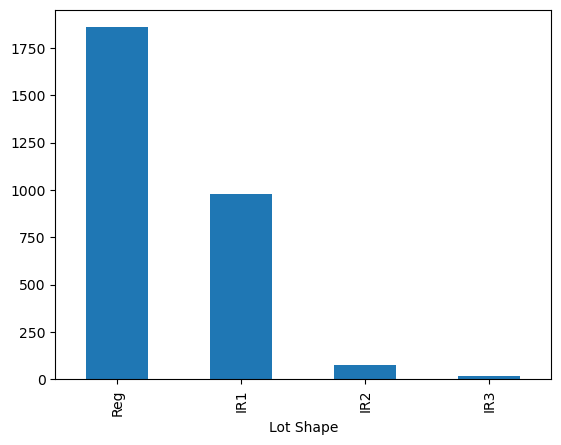

In [69]:
x['Lot Shape'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

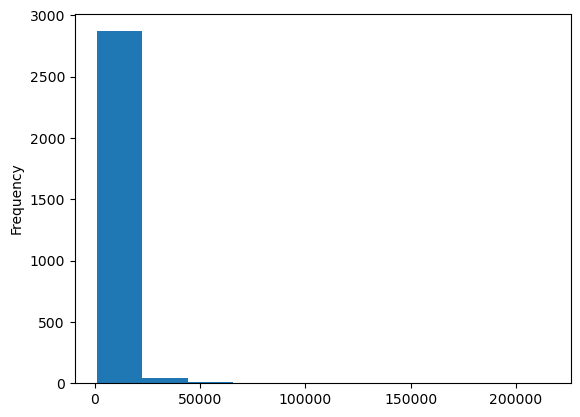

In [86]:
#x['Lot Area'].hist()
x['Lot Area'].plot(kind='hist')

<Axes: ylabel='Density'>

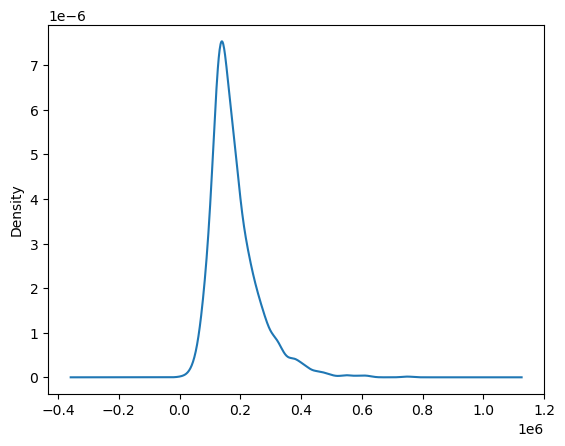

In [193]:
x['SalePrice'].plot(kind='kde')

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

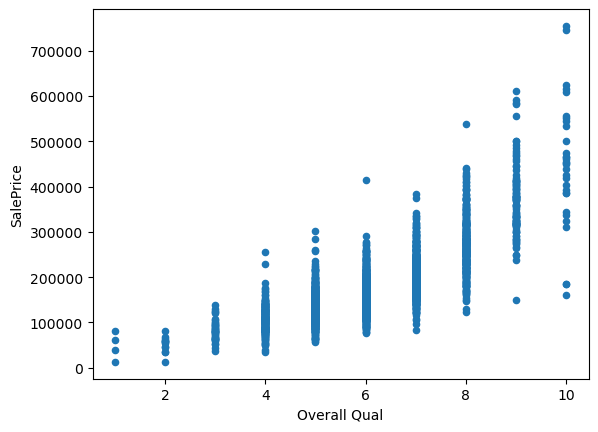

In [177]:
x.plot(kind='scatter', x='Overall Qual', y='SalePrice')

<Axes: xlabel='1st Flr SF', ylabel='SalePrice'>

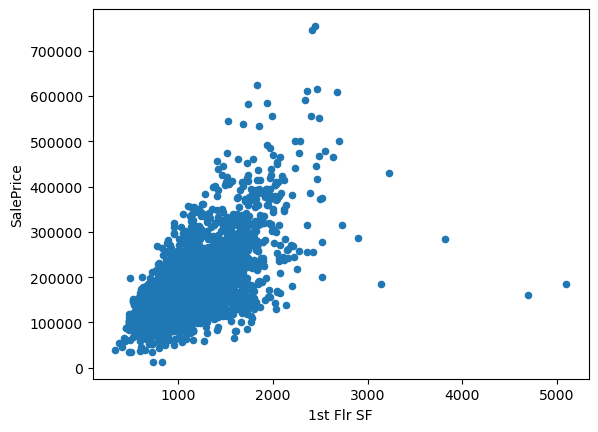

In [197]:
x.plot(kind='scatter', x='1st Flr SF', y='SalePrice')

<Axes: xlabel='1st Flr SF', ylabel='SalePrice'>

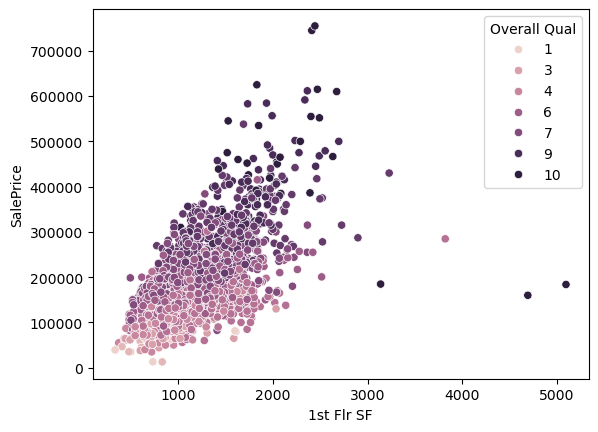

In [205]:
import seaborn as sns
sns.scatterplot(x='1st Flr SF', y='SalePrice', data=x, hue='Overall Qual')


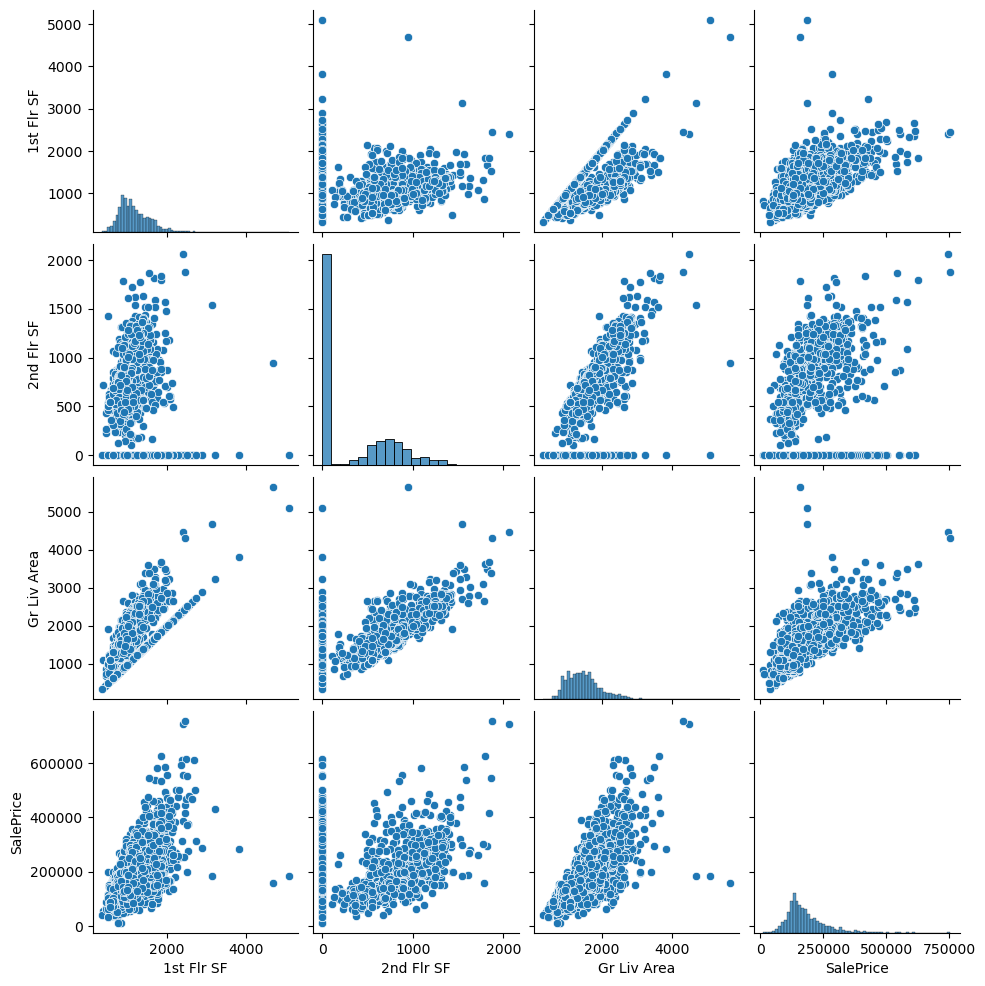

In [308]:
sns.pairplot(x,vars=['1st Flr SF', '2nd Flr SF','Gr Liv Area', 'SalePrice'])

In [262]:
#verify the correlation
#can be used with more than just two features
x[['1st Flr SF', '2nd Flr SF']].corr()

,1st Flr SF,2nd Flr SF
1st Flr SF,1.000000,-0.250057
2nd Flr SF,-0.250057,1.000000


<Axes: >

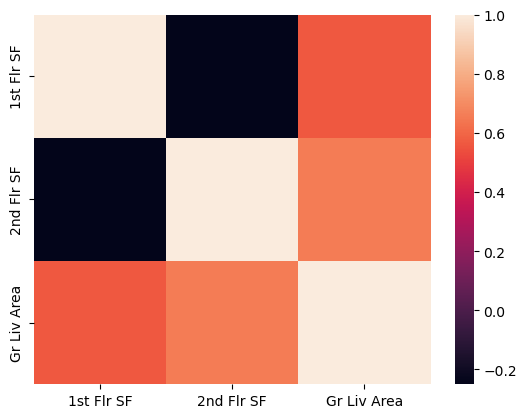

In [306]:
corr_matrix = x[['1st Flr SF', '2nd Flr SF','Gr Liv Area']].dropna().corr()
sns.heatmap(corr_matrix)


In [280]:
#what is the average price of the houses for each overall quality rating ?
x.groupby('Overall Qual')['SalePrice'].agg(['mean','count']).sort_values('mean')

,mean,count
Overall Qual,,
1,48725.000000,4
2,52325.307692,13
3,83185.975000,40
4,106485.097345,226
5,134752.516364,825
6,162130.318306,732
7,205025.760797,602
8,270913.594286,350
9,368336.766355,107


In [297]:
x.pivot_table(values='SalePrice', index='Overall Cond', columns='Overall Qual')


Overall Qual,1,2,3,4,5,6,7,8,9,10
Overall Cond,,,,,,,,,,
1,61000.0,55000.000000,65000.000000,71684.500000,82750.000000,NaN,NaN,NaN,NaN,NaN
2,NaN,38344.500000,80750.000000,87000.000000,108666.666667,115000.000000,NaN,NaN,394432.000000,NaN
3,60400.0,43437.000000,66359.375000,100508.181818,96187.500000,128265.500000,197000.000000,NaN,150000.000000,NaN
4,NaN,56909.666667,91144.444444,95704.548387,132840.488372,153180.000000,194125.000000,235000.000000,NaN,NaN
5,13100.0,61875.000000,88189.909091,111398.355263,135415.100000,165237.123596,206979.543860,271201.205047,370167.638095,442919.178571
6,NaN,NaN,72283.333333,109054.945455,137035.995475,154522.724138,195950.890625,270993.833333,NaN,755000.000000
7,NaN,NaN,120000.000000,104723.452381,135656.741573,169514.398305,204901.837209,274000.000000,NaN,NaN
8,NaN,NaN,112987.500000,111066.666667,136481.132075,159544.067797,182957.142857,302200.000000,NaN,NaN
9,NaN,NaN,NaN,116875.000000,126477.777778,146550.000000,221200.000000,251494.444444,NaN,400000.000000


In [304]:
x.columns


Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Pool Area',
       'SalePrice'],
      dtype='object')

<Axes: xlabel='Neighborhood'>

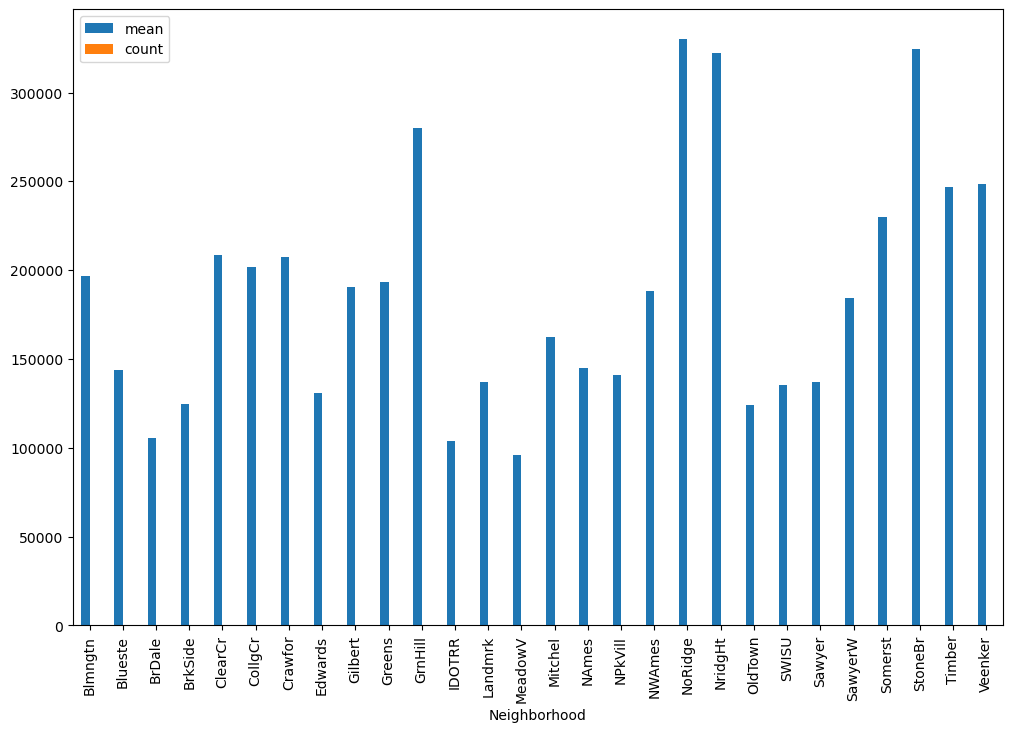

In [322]:
neighborhood_avg = x.groupby('Neighborhood')['SalePrice'].agg(['mean','count'])
neighborhood_avg.plot(kind='bar', figsize=(12, 8))

In [369]:
#cleaning and prepping the data
x.dropna(inplace=True)
x=pd.get_dummies(x,columns=['Lot Shape','Neighborhood','House Style',])


<class 'pandas.core.frame.DataFrame'>
Index: 2219 entries, 0 to 2929
Data columns (total 89 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MS SubClass           2219 non-null   int64  
 1   Lot Frontage          2219 non-null   float64
 2   Lot Area              2219 non-null   int64  
 3   Overall Qual          2219 non-null   int64  
 4   Overall Cond          2219 non-null   int64  
 5   Year Built            2219 non-null   int64  
 6   Year Remod/Add        2219 non-null   int64  
 7   Mas Vnr Area          2219 non-null   float64
 8   Exter Qual            2219 non-null   object 
 9   Exter Cond            2219 non-null   object 
 10  Foundation            2219 non-null   object 
 11  Bsmt Qual             2219 non-null   object 
 12  Bsmt Cond             2219 non-null   object 
 13  Bsmt Exposure         2219 non-null   object 
 14  BsmtFin SF 1          2219 non-null   float64
 15  BsmtFin SF 2          2219

In [375]:
 x=pd.get_dummies(x,columns=['Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Cond','Bsmt Exposure','Heating QC','Electrical','Kitchen Qual','Garage Type','Garage Qual','Garage Cond','Paved Drive'])

In [381]:
x=pd.get_dummies(x,columns=['Functional'])

In [389]:
x.drop(['SalePrice'], axis=1)
y=x['SalePrice']

In [415]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=13)
rfr.fit(X_train,y_train)
prediction=rfr.predict(X_test)


In [419]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(prediction, y_test)
mean_squared_error(prediction, y_test)**0.5

2821.754761212708